In [1]:
import pandas as pd

# Рассматривать будем датасет об отзывах о банках 

In [2]:
df = pd.read_csv('final_review_dataset_extended.csv')
df.head()

,Unnamed: 0,bank,type,user_name,review_title,review,review_dttm,review_views,review_comments,rating_value,Вежливые сотрудники,Доступность и поддержка,Прозрачные условия,"Удобство приложения, сайта",review_len,review_len_in_tokens
0,1,Россельхозбанк,Person,user-430412136020,Открытие счета ИП,Добрый день! Я являюсь ИП и стоял перед выборо...,2023-05-02,773,0,5,3.0,3.0,3.0,3.0,171.0,363.0
1,2,Россельхозбанк,Person,user-60268947545,Спасибо за помощь,Здравствуйте! Достаточно давно являюсь клиенто...,2023-04-02,560,0,5,3.0,3.0,3.0,3.0,66.0,149.0
2,3,Банк ДОМ.РФ,Person,user-294212759595,Отличный сервис,"Здравствуйте,являюсь клиентом банка с ноября 2...",2023-03-02,737,1,5,3.0,3.0,3.0,3.0,70.0,164.0
3,4,Альфа-Банк,Person,user-841712733484,Блокировка денежных средств,14 января 2023 года была попытка перевода дене...,2023-01-02,627,3,1,NaN,NaN,NaN,NaN,170.0,337.0
4,5,Банк «Открытие»,Person,NaN,Хамство сотрудников Открытия,"У меня сложилось устойчивое впечатление, что в...",2023-01-02,517,31,1,1.0,1.0,1.0,1.0,106.0,210.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12392 entries, 0 to 12391
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12392 non-null  int64  
 1   bank                        12392 non-null  object 
 2   type                        12392 non-null  object 
 3   user_name                   12361 non-null  object 
 4   review_title                12388 non-null  object 
 5   review                      12392 non-null  object 
 6   review_dttm                 12392 non-null  object 
 7   review_views                12392 non-null  int64  
 8   review_comments             12392 non-null  int64  
 9   rating_value                12392 non-null  int64  
 10  Вежливые сотрудники         11377 non-null  float64
 11  Доступность и поддержка     11377 non-null  float64
 12  Прозрачные условия          11377 non-null  float64
 13  Удобство приложения, сайта  113

### Видим что есть пропуски в датасете

In [4]:
# Оставляем только нужные столбцы
df = df[["bank", "review_title", "review",  "rating_value"]]

# Удаляем строки с пропусками
df = df.dropna()

display(df)

,bank,review_title,review,rating_value
0,Россельхозбанк,Открытие счета ИП,Добрый день! Я являюсь ИП и стоял перед выборо...,5
1,Россельхозбанк,Спасибо за помощь,Здравствуйте! Достаточно давно являюсь клиенто...,5
2,Банк ДОМ.РФ,Отличный сервис,"Здравствуйте,являюсь клиентом банка с ноября 2...",5
3,Альфа-Банк,Блокировка денежных средств,14 января 2023 года была попытка перевода дене...,1
4,Банк «Открытие»,Хамство сотрудников Открытия,"У меня сложилось устойчивое впечатление, что в...",1
...,...,...,...,...
12387,Совкомбанк,Скорая помощь,Здравствуйте.Хочу выразить свою благодарность ...,5
12388,Кредит Европа Банк,Прислали смс,Вчера моей маме тоже пришла смс от вашего имен...,1
12389,Совкомбанк,Акция 0-0-24 На товар дня! Не присылают промок...,"Покупали в рассрочку в Эльдорадо (ТЦ Водный), ...",1
12390,ЮниКредит Банк,Прекрасное обслуживание в ДО Пятницкая,8 ноября я обратилась в ДО Пятницкая к сотрудн...,5


### Посчитайем количество отзывов на разные банки.


In [5]:
num_of_bank_review= df.groupby(['bank'])['review'].count().reset_index()
num_of_bank_review = num_of_bank_review.sort_values(by='review', ascending=False)
display(num_of_bank_review)

,bank,review
72,Тинькофф Банк,1551
69,Совкомбанк,1501
27,ВТБ,1275
78,Хоум Кредит Банк,977
4,Альфа-Банк,861
...,...,...
45,Металлинвестбанк,1
34,Икано Банк,1
42,МОСОБЛБАНК,1
39,Кредит Урал Банк,1


### Выведем примеры отзывов

In [6]:
df['review'].head().tolist()

['Добрый день! Я являюсь ИП и стоял перед выбором банка для открытия расчетного счета. Посоветовали обратиться в Россельхозбанк, что я и сделал , и не прогадал. Теперь хочу рассказать о моем впечатлении , может быть это тоже поможет кому нибудь сделать выбор ! Офис расположен удобно, электронная очередь обеспечивает порядок и дисциплину. После взятия талона вызвали через 2 минуты к специалисту. Мне подробно рассказали про условия счета, про возможность проведения платежных поручений, про мобильное приложение. На все вопросы ответили, приложение подключили и рассказали, как им пользоваться. Всего минут 10 и мою потребность полностью удовлетворили. Сотрудник просто грамотно и на понятном нам клиентам языке рассказал все, открыто и без всяких подводных камней. Это приятно удивляет. Так же я рассказал, что планирую кредитоваться и узнал условия текущие по кредитам. С этим вопросом мне надо подумать, так что мы с сотрудником обменялись контактными данными для связи и назначения встречи в оф

### Посчитаем длину отзывов в символах

In [7]:
symb_length = df['review'].apply(len)
symb_length[:15]

0     1191
1      491
2      489
3     1073
4      695
5     1416
6      669
7      385
8      881
9     1230
10     425
11     842
12     837
13    1610
14     310
Name: review, dtype: int64

### Выведем гистограмму распределения длин отзывов в символах

<Axes: ylabel='Frequency'>

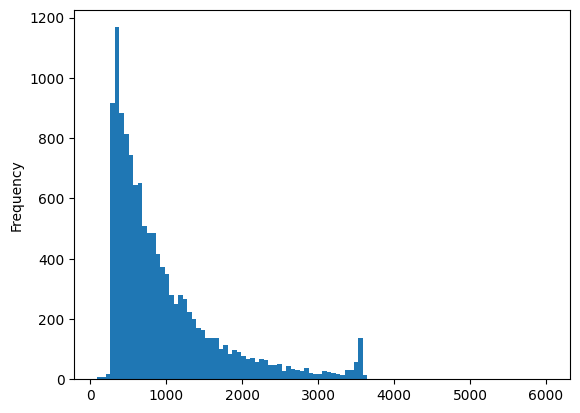

In [8]:
symb_length.plot(kind = 'hist', bins = 100)

### Посчитаем длину каждого отзыва в словах

<Axes: ylabel='Frequency'>

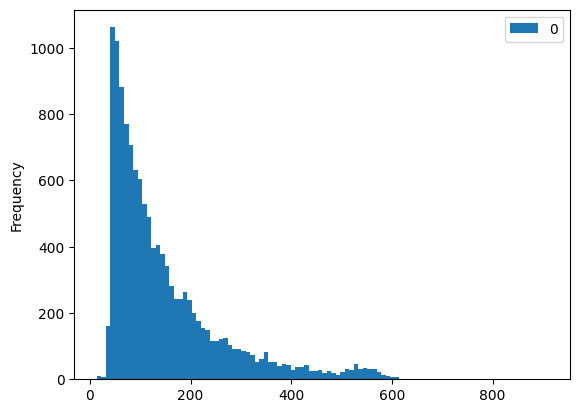

In [9]:
replies = [txt.split() for txt in df['review']]

word_count = []
for i in replies:
  reply = str(i)
  word_count.append(len(reply.split()))
     

word_count_df = pd.DataFrame(word_count)
word_count_df.plot(kind = 'hist', bins = 100)

### Можно сделать вывод, что формы распределения частот в символах и словах практически одинаковы.

### Найдем 10 самых частых:
##### - слов 
##### - слов без стоп-слов 
##### - лемм 
##### - существительных 

In [10]:
# загрузим знаки пунктуации
from string import punctuation
punctuation

# загрузим счетчик
from collections import Counter

#Для решения задачи нахождения 10-и самых частых слов (удалив только знаки пунктуации) воспользуемся  токенизатором 'word_tokenize' из библиотеки NLTK.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:


# корпус для п.1 (без знаков пунктуации) создадим из 15000 позиций, чтобы уменьшить время обработки 
# Создаем корпус из первых 15000 отзывов, исключая знаки пунктуаци
corpus = [token for response in df['review'][:15000] for token in word_tokenize(response) if token not in punctuation]
print(len(corpus))
corpus[:5]

1817955


['Добрый', 'день', 'Я', 'являюсь', 'ИП']

In [12]:
# прогоним корпус через счетчик
freq_dict = Counter(corpus)

# получим список 10 самых частых слов в корпусе (подвыборке из 15000 строк)
freq_dict.most_common(10)

[('в', 59709),
 ('и', 52995),
 ('не', 41401),
 ('на', 32003),
 ('что', 29810),
 ('с', 21411),
 ('я', 20273),
 ('по', 19287),
 ('мне', 14746),
 ('банка', 14085)]

In [13]:
# Для решения остальных задач из списка "10-и самых частых" сделаем более глубокий препроцессинг текста. 
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
pip install pymystem3

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Kq\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from pymystem3 import Mystem

In [16]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
] + list(punctuation)  #добавим знаки пунктуации к списку стоп-слов
ru_words = re.compile("[А-Яа-я]+") # позволяет отфильтровать все не-русские слова (например, английские слова, цифры, символы).

def words_only(txt):
    return " ".join(ru_words.findall(txt)) #Использует регулярное выражение ru_words для поиска всех русских слов в тексте txt. Возвращает текст, содержащий только русские слова



# Инициализация MyStem
mystem = Mystem()

# Функция для лемматизации текста
def lemmatize(txt):
    try:
        # Лемматизируем текст с помощью MyStem
        lemmas = mystem.lemmatize(txt.lower())
        # Объединяем леммы в строку
        return "".join(lemmas).strip()
    except:
        # В случае ошибки возвращаем пробел
        return " "

def remove_stopwords(txt, mystopwords = mystopwords): #Фильтрует слова, удаляя те, которые находятся в списке стоп-слов mystopwords.
    try:
        return " ".join([token for token in txt.split() if not token in mystopwords])
    except:
        return ""

# "тяжелый" препроцессинг (с лемматизацией)    
def preprocess(txt):
    return remove_stopwords(lemmatize(words_only(txt.lower())))

# "легкий" препроцессинг (без лемматизации)
def lite_preprocess(txt): 
    return remove_stopwords(words_only(txt.lower()))
     

In [17]:
# получим список 10-и самых частых слов без стоп-слов и знаков пунктуации.
response_without_stop = [token for response in df['review'][:15000] for token in word_tokenize(response) if token not in mystopwords]
print(len(response_without_stop))
response_without_stop[:5]
     

1236596


['Добрый', 'день', 'Я', 'являюсь', 'ИП']

In [18]:

freq_dict = Counter(response_without_stop)

# попробуем получить список 10-и самых частых слов без стоп-слов (в подвыборке из 5000 строк)
freq_dict.most_common(10)

[('банка', 14085),
 ('банк', 9880),
 ('В', 8026),
 ('карту', 7916),
 ('Я', 6152),
 ('карты', 5465),
 ('деньги', 5148),
 ('день', 4436),
 ('очень', 4336),
 ('дней', 3844)]

In [19]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Kq\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
from tqdm import tqdm
tqdm.pandas() 

In [21]:
response_lemmas = df['review'].astype('str')[:5000].progress_apply(preprocess)

100%|██████████| 5000/5000 [2:30:06<00:00,  1.80s/it]  


In [ ]:
response_lemmas

0       добрый день являться ипать стоять выбор банка ...
1       здравствовать достаточно давно являться клиент...
2       здравствовать являться клиент банка ноябрь год...
3       январь год попытка перевод деньги размер клиен...
4       складываться устойчивый впечатление банк работ...
                              ...                        
4995    срочно нужно погасить задолженность кредитный ...
4996    хотеть поблагодарить ва николай сотрудник совк...
4997    обращаться отделение южный узнавать счет закры...
4998    здравствовать примерно год назад становиться и...
4999    оформлять карта ссылка друг условие получение ...
Name: review, Length: 5000, dtype: object

In [ ]:

# прогоним результат лемматизации  через токенизатор, чтобы разбить на отдельные слова
response_lemmas_tokenized = [token for response in response_lemmas for token in word_tokenize(response) if token not in mystopwords]
print(len(response_lemmas_tokenized))
response_lemmas_tokenized[:5]

466494


['добрый', 'день', 'являться', 'ипать', 'стоять']

In [ ]:
freq_dict = Counter(response_lemmas_tokenized)

# список 10-и самых частых лемм (в подвыборке из 15000 строк)
freq_dict.most_common(10)

[('банк', 15061),
 ('карта', 9150),
 ('день', 4491),
 ('сотрудник', 4148),
 ('весь', 3435),
 ('вопрос', 3070),
 ('деньги', 2991),
 ('счет', 2935),
 ('клиент', 2870),
 ('год', 2772)]

 Найдем 10 самых частых существительных.

In [25]:
# Инициализация MyStem
mystem = Mystem()

# Функция для выделения существительных из текста
def parsing_nouns(txt):
    try:
        # Анализируем текст с помощью MyStem
        analysis = mystem.analyze(txt.lower())
        # Извлекаем слова, которые являются существительными (грамматическая категория 'S')
        nouns = [word['analysis'][0]['lex'] for word in analysis if 'analysis' in word and word['analysis'] and 'S' in word['analysis'][0]['gr']]
        return " ".join(nouns)
    except:
        return " "

# Применяем функцию parsing_nouns к предобработанному списку лемм
response_nouns = response_lemmas.progress_apply(parsing_nouns)

# Токенизация списка существительных
response_nouns_tokenized = [token for response in response_nouns for token in word_tokenize(response) if token not in mystopwords]

# Выводим количество токенов и первые 5 токенов
print(len(response_nouns_tokenized))
print(response_nouns_tokenized[:5])

# Считаем частоту слов
freq_dict = Counter(response_nouns_tokenized)

# Выводим 10 самых частых существительных
print(freq_dict.most_common(10))

100%|██████████| 5000/5000 [2:21:10<00:00,  1.69s/it]  


246347
['день', 'выбор', 'банк', 'открытие', 'счет']
[('банк', 16065), ('карта', 9150), ('день', 4491), ('сотрудник', 4148), ('вопрос', 3070), ('деньги', 2991), ('счет', 2935), ('клиент', 2870), ('год', 2773), ('кредит', 2594)]


### Построим кривые Ципфа 

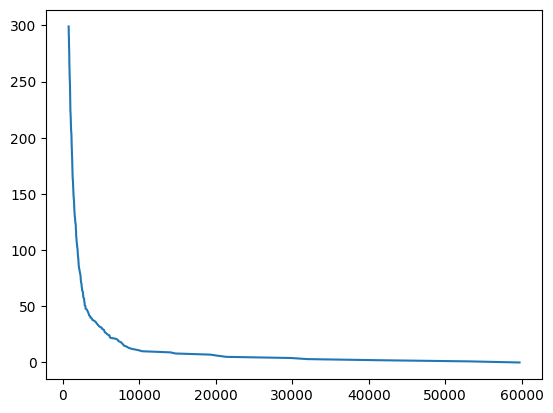

In [26]:
freq_dict = Counter(corpus)

# кривая Ципфа
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

На графике мы видим, что частотность использования слов в корпусе убывает очень быстро.  

### В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5.  Используйем меру tf-idf для того, чтобы найти ключевые слова и биграммы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

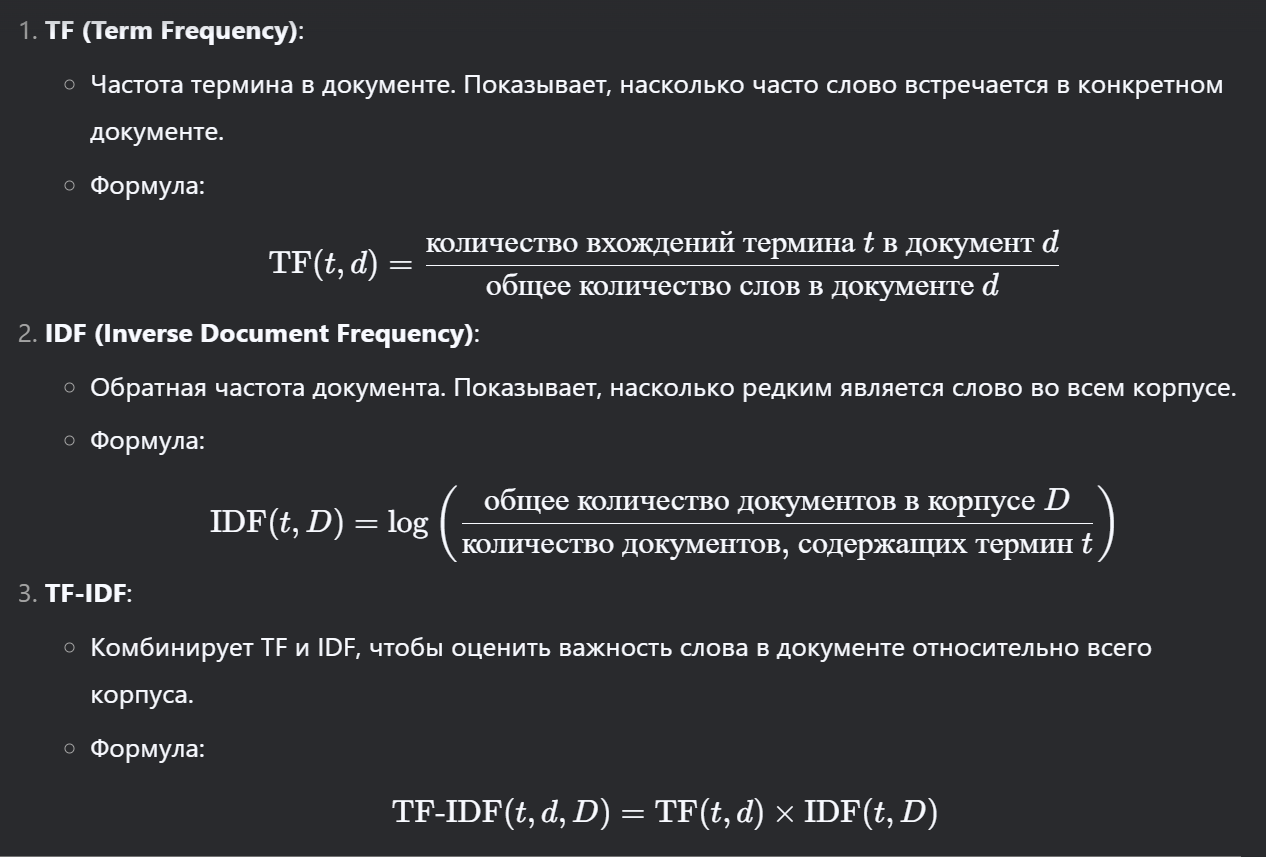

In [29]:
df['rating_value'].value_counts()

rating_value
1    5748
5    4885
2     775
4     584
3     396
Name: count, dtype: int64

для положительных отзывов (с оценкой 5)

In [30]:
df_positive_responses = df[['review', 'rating_value']].loc[df['rating_value'] == 5]
df_positive_responses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4885 entries, 0 to 12391
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        4885 non-null   object
 1   rating_value  4885 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [31]:
# примеры положительных отзывов
df_positive_responses['review'].head().tolist()

['Добрый день! Я являюсь ИП и стоял перед выбором банка для открытия расчетного счета. Посоветовали обратиться в Россельхозбанк, что я и сделал , и не прогадал. Теперь хочу рассказать о моем впечатлении , может быть это тоже поможет кому нибудь сделать выбор ! Офис расположен удобно, электронная очередь обеспечивает порядок и дисциплину. После взятия талона вызвали через 2 минуты к специалисту. Мне подробно рассказали про условия счета, про возможность проведения платежных поручений, про мобильное приложение. На все вопросы ответили, приложение подключили и рассказали, как им пользоваться. Всего минут 10 и мою потребность полностью удовлетворили. Сотрудник просто грамотно и на понятном нам клиентам языке рассказал все, открыто и без всяких подводных камней. Это приятно удивляет. Так же я рассказал, что планирую кредитоваться и узнал условия текущие по кредитам. С этим вопросом мне надо подумать, так что мы с сотрудником обменялись контактными данными для связи и назначения встречи в оф

In [32]:
# сделаем препроцессинг(включая лемматизацию) отзывов с положительной оценкой
df_positive_responses.text = df_positive_responses['review'].astype('str').progress_apply(preprocess)

100%|██████████| 4885/4885 [2:25:45<00:00,  1.79s/it]  
C:\Users\Kq\AppData\Local\Temp\ipykernel_38740\515810938.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_positive_responses.text = df_positive_responses['review'].astype('str').progress_apply(preprocess)


In [33]:
df_positive_responses.head()

,review,rating_value
0,Добрый день! Я являюсь ИП и стоял перед выборо...,5
1,Здравствуйте! Достаточно давно являюсь клиенто...,5
2,"Здравствуйте,являюсь клиентом банка с ноября 2...",5
7,Всем добрый день! Хочу поделиться опытом получ...,5
33,Оформил кредитную карту для участия в акции 10...,5


In [34]:
# загрузим библиотеку для разбивки на n-граммы и TF-IDF-векторизатор
from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:

# создадим векторизатор для разбивки на униграммы
positive_response_unigrams = TfidfVectorizer() # По умолчанию - униграммы (1,1)

In [36]:
# сформируем "мешок слов" с униграммами для полож.отзывов
bow_positive_unigrams = positive_response_unigrams.fit_transform(df_positive_responses['review'])

In [37]:
terms = positive_response_unigrams.get_feature_names_out()

# суммируем меру tf-idf каждого слова в "мешке слов"
sums = bow_positive_unigrams.sum(axis=0)

# объединяем каждое слово и его tf-idf, сортируем по убыванию
data = []
for col, term in enumerate(terms):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['Слово(униграмма)','Ранг по tf-idf'])
ranking = ranking.sort_values('Ранг по tf-idf', ascending=False)
ranking[:15]

,Слово(униграмма),Ранг по tf-idf
12126,на,204.870362
13018,не,193.164793
17652,по,173.945215
29472,что,168.220064
16562,очень,149.788177
1621,банка,149.717570
6838,за,147.413818
11752,мне,141.292826
3807,все,134.027376
1619,банк,121.563694


In [38]:
# Теперь разобьём положительные отзывы на биграммы. Может быть, получится более информативно, чем разбивка на униграммы.
# Создадим векторизатор для разбивки на биграммы
positive_response_bigrams = TfidfVectorizer(ngram_range=(2, 2))

In [39]:
# сформируем "мешок слов" с биграммами для полож.отзывов
bow_positive_bigrams = positive_response_bigrams.fit_transform(df_positive_responses['review'])

In [40]:
terms = positive_response_bigrams.get_feature_names_out()

# суммируем меру tf-idf каждой биграммы в "мешке слов"
sums = bow_positive_bigrams.sum(axis=0)

# объединяем каждую биграмму и её tf-idf, сортируем по убыванию
data = []
for col, term in enumerate(terms):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['Биграмма','Ранг по tf-idf'])
ranking = ranking.sort_values('Ранг по tf-idf', ascending=False)
ranking[:15]

,Биграмма,Ранг по tf-idf
199588,так же,24.276747
46618,добрый день,24.007142
199613,так как,23.659352
216560,хочу выразить,22.839043
191408,спасибо за,21.478178
44930,для меня,19.991850
96896,на все,19.485074
225075,являюсь клиентом,19.006697
35403,выразить благодарность,18.814190
137719,по карте,17.673519


In [41]:
# Теперь сделаем то же самое  для отрицательных отзывов (с оценкой 1) 
df_negative_responses = df[['review', 'rating_value']].loc[df['rating_value'] == 1]
df_negative_responses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5748 entries, 3 to 12389
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        5748 non-null   object
 1   rating_value  5748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.7+ KB


In [42]:
# примеры отрицательных отзывов
df_negative_responses['review'].head().tolist()

['14 января 2023 года была попытка перевода денег в размере 15 тыс клиенту другого банка, но произошел какой-то сбой в приложении, деньги с карты списались, но до получателя не дошли. Начали звонить в техподдержку, ощущение что там сидят вчерашние школьники. Нам обещали что через пять рабочих дней деньги вернуться, прошло пять дней, звоним, там нам очередной профи сообщает что предыдущий оператор не так оформил заявку, через пару дней все исправят, проходит еще пару дней, следующий оператор утверждает что надо не в такой форме заявку подать, и через день все вернется.... потом мы поехали в офис Альфа банка, там заверили что в течении суток все решится, но само собой ничего не решилось, нам написали что нужно еще пару дней подождать... Сегодня 01.02.2023 деньги висят в блокировке!!!! То ли в Альфа банке в принципе такое отношение к клиентам, либо там работают полнейшие непрофи (это я корректно выразилась, хотя очень хочется назвать по другому), что тоже говорит само за себя. Альфа банк,

In [43]:
df_negative_responses.text = df_negative_responses['review'].astype('str').progress_apply(preprocess)

100%|██████████| 5748/5748 [2:56:25<00:00,  1.84s/it]  
C:\Users\Kq\AppData\Local\Temp\ipykernel_38740\1188052271.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_negative_responses.text = df_negative_responses['review'].astype('str').progress_apply(preprocess)


In [44]:
df_negative_responses.head()

,review,rating_value
3,14 января 2023 года была попытка перевода дене...,1
4,"У меня сложилось устойчивое впечатление, что в...",1
5,Прошу хоть раз сайт вмешаться в это беззаконие...,1
6,"Мне 17 лет, карту этого банка получил почти го...",1
9,27.01.23 обратилась в отделение на пр.Просвеще...,1


In [45]:
# создадим векторизатор для разбивки отриц.отзывов на униграммы
negative_response_unigrams = TfidfVectorizer() # параметр ngram_range можно не задавать. По умолчанию - униграммы (1,1)

In [46]:
# сформируем "мешок слов" с униграммами для отриц.отзывов
bow_negative_unigrams = negative_response_unigrams.fit_transform(df_negative_responses.text)

In [47]:
terms = negative_response_unigrams.get_feature_names_out()

# суммируем меру tf-idf каждого слова в "мешке слов"
sums = bow_negative_unigrams.sum(axis=0)

# объединяем каждое слово и его tf-idf, сортируем по убыванию
data = []
for col, term in enumerate(terms):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['Слово(униграмма)','Ранг по tf-idf'])
ranking = ranking.sort_values('Ранг по tf-idf', ascending=False)
ranking[:15]

,Слово(униграмма),Ранг по tf-idf
618,банк,413.739232
5745,карта,359.000154
3230,день,200.264982
3232,деньги,189.069694
16463,сотрудник,167.987744
17116,счет,163.079971
9602,обращение,154.214715
6498,кредит,153.620018
15766,сказать,135.787067
1478,весь,130.072577


In [48]:
# Теперь разобьём отрицательные отзывы на биграммы. Создадим векторизатор для разбивки на биграммы
negative_response_bigrams = TfidfVectorizer(ngram_range=(2, 2))

In [49]:
# сформируем "мешок слов" с биграммами для отриц.отзывов
bow_negative_bigrams = negative_response_bigrams.fit_transform(df_negative_responses['review'])

In [50]:
terms = negative_response_bigrams.get_feature_names_out()

# суммируем меру tf-idf каждой биграммы в "мешке слов"
sums = bow_negative_bigrams.sum(axis=0)

# объединяем каждую биграмму и её tf-idf, сортируем по убыванию
data = []
for col, term in enumerate(terms):
    data.append((term, sums[0, col]))

ranking = pd.DataFrame(data, columns=['Биграмма','Ранг по tf-idf'])
ranking = ranking.sort_values('Ранг по tf-idf', ascending=False)
ranking[:15]

,Биграмма,Ранг по tf-idf
2737,11 2022,37.128031
3353,12 2022,35.264267
418071,так как,31.812698
230362,ничего не,28.789467
381942,сказали что,27.607456
77582,горячую линию,26.718711
200766,на горячую,25.946848
215425,не могу,25.905683
430733,том что,25.857289
418181,так не,25.360676


### Построим несколько тематических моделей коллекции документов с разным числом тем

In [52]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ------ --------------------------------- 3.7/24.0 MB 31.3 MB/s eta 0:00:01
   ---------------- ----------------------- 10.0/24.0 MB 28.3 MB/s eta 0:00:01
   ----------------------------- ---------- 17.6/24.0 MB 31.7 MB/s eta 0:00:01
   ----------------------------------- ---- 21.5/24.0 MB 27.8 MB/s eta 0:00:01
   -------------------------------------- - 23.3/24.0 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------  23.9/24.0 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 19.0 MB/s eta 0:00:00


    pytz (>dev)
         ~^

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Kq\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
# Воспользуемся мерами tf-idf и косинусной близости векторов tf-idf
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities

In [54]:
# Тематическое моделирование сделаем на основании корпуса лемм.
texts = [text.split() for text in response_lemmas]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [55]:
len(corpus)

5000

In [56]:
# создадим модель tf-idf на основании корпуса
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
     

In [57]:
# рассчитаем косинусную близость между векторами tf-idf
index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]
     

In [58]:
# содержательный анализ тем проведем с использованием модели LSI (латентно-семантического анализа) из библиотеки Gensim
from gensim.models import lsimodel

In [60]:
# сперва попробуем взять 10 тем

lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=10)

In [61]:
lsi.show_topics()

[(0,
  '0.171*"карта" + 0.119*"кредит" + 0.115*"счет" + 0.112*"деньги" + 0.103*"сотрудник" + 0.102*"день" + 0.101*"обращение" + 0.095*"кредитный" + 0.092*"приложение" + 0.091*"условие"'),
 (1,
  '-0.198*"очень" + -0.162*"халва" + -0.161*"вклад" + -0.159*"акция" + -0.158*"покупка" + -0.146*"кэшбэк" + -0.137*"условие" + -0.137*"совкомбанк" + -0.128*"спасибо" + -0.123*"бонус"'),
 (2,
  '-0.353*"акция" + -0.225*"покупка" + -0.210*"бонус" + -0.205*"кэшбэк" + 0.191*"кредит" + 0.187*"вклад" + -0.153*"начислять" + -0.142*"друг" + -0.132*"рубль" + -0.130*"карта"'),
 (3,
  '-0.216*"платеж" + 0.204*"доставка" + 0.185*"курьер" + -0.179*"сумма" + -0.177*"процент" + -0.172*"кредит" + -0.156*"погашение" + 0.148*"заявка" + 0.144*"карта" + -0.141*"списывать"'),
 (4,
  '-0.310*"кредит" + 0.291*"перевод" + 0.278*"банкомат" + 0.239*"комиссия" + 0.222*"деньги" + -0.176*"заявка" + 0.143*"счет" + -0.133*"страховка" + -0.130*"договор" + 0.129*"средство"'),
 (5,
  '0.719*"вклад" + 0.244*"открывать" + -0.168*"к

На основании модели LSI с использованием 10-и тем можно сделать вывод, что в целом вопросы касаются кредитных карт, страхования вкладов и задолженности, работы банкоматов. 

In [62]:
# теперь попробуем взять 50 тем

lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=50)
     

In [63]:
lsi.show_topics()

[(0,
  '0.171*"карта" + 0.119*"кредит" + 0.115*"счет" + 0.112*"деньги" + 0.103*"сотрудник" + 0.102*"день" + 0.101*"обращение" + 0.095*"кредитный" + 0.092*"приложение" + 0.091*"условие"'),
 (1,
  '0.198*"очень" + 0.162*"халва" + 0.160*"вклад" + 0.159*"акция" + 0.158*"покупка" + 0.146*"кэшбэк" + 0.137*"условие" + 0.137*"совкомбанк" + 0.128*"спасибо" + 0.124*"бонус"'),
 (2,
  '0.354*"акция" + 0.225*"покупка" + 0.209*"бонус" + 0.206*"кэшбэк" + -0.190*"кредит" + -0.187*"вклад" + 0.150*"начислять" + 0.142*"друг" + 0.130*"карта" + 0.130*"рубль"'),
 (3,
  '-0.217*"платеж" + 0.204*"доставка" + 0.188*"курьер" + -0.178*"сумма" + -0.178*"процент" + -0.171*"кредит" + -0.157*"погашение" + 0.150*"заявка" + 0.145*"карта" + -0.142*"списывать"'),
 (4,
  '0.310*"кредит" + -0.287*"перевод" + -0.276*"банкомат" + -0.239*"комиссия" + -0.224*"деньги" + 0.177*"заявка" + -0.142*"счет" + 0.132*"страховка" + 0.131*"договор" + -0.131*"средство"'),
 (5,
  '-0.720*"вклад" + -0.243*"открывать" + 0.167*"комиссия" + -0

В целом картина не изменилась, но можно сделать вывод, что для качественного тематического моделирования необходима более качественная предобработка корпуса. 

### Классификация текстов

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5).

In [64]:
df['rating_value'].value_counts()

rating_value
1    5748
5    4885
2     775
4     584
3     396
Name: count, dtype: int64

Как видим, множества отрицательных (с оценкой 1) и положительных отзывов (с оценкой 5) сильно разбалансированы: отрицательных в 3 раза больше, чем положительных.
#Поэтому для создания сбалансированной модели возьмем все положительные отзывы и примерно столько же отрицательных (или чуть больше для сохранения тренда).


In [65]:
# для положительных
N2 = len(df[df['rating_value'] == 5])
N2

4885

In [66]:

# для отрицательных
N1 = round(len(df[df['rating_value'] == 1])*0.35)
N1

2012

In [67]:
# выборка отрицательных
negative_sample = df[df['rating_value'] == 1][['review', 'rating_value']].sample(N1)
negative_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2012 entries, 2656 to 10615
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        2012 non-null   object
 1   rating_value  2012 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.2+ KB


In [68]:

# выборка положительных
positive_sample = df[df['rating_value'] == 5][['review', 'rating_value']].sample(N2)
positive_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4885 entries, 10896 to 9809
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        4885 non-null   object
 1   rating_value  4885 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [69]:

# объединим выборки
sum_sample = pd.concat([negative_sample, positive_sample])
sum_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6897 entries, 2656 to 9809
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review        6897 non-null   object
 1   rating_value  6897 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 161.6+ KB


In [70]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [71]:
# входящие признаки (исходный текст отзывов, без векторизации)
x = sum_sample['review']

# создадим и обучим векторизатор tf-idf на отдельных словах - униграммах (с параметрами "по умолчанию")
tfidf = TfidfVectorizer()
x_vectorized = tfidf.fit_transform(x)
print("x_vectorized.shape: ", x_vectorized.shape)

# целевая переменная (не требует векторизации)
y = sum_sample['rating_value']

x_vectorized.shape:  (6897, 45117)


In [72]:
# 30% на тест-выборку
x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.3, random_state=21)

In [73]:

# загрузим необходимые библиотеки
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [74]:
# Обучим модель в базовом варианте (на униграммах) с использованием алгоритма случайного леса 
# (показывающего в ряде случаев лучшие результаты классификации по сравнению с логистической регрессией).
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [75]:

# Сделаем прогноз на тестовой выборке и выведем метрики
rfc_test = rfc.predict(x_test)
print(classification_report(rfc_test, y_test))

              precision    recall  f1-score   support

           1       0.68      0.91      0.78       465
           5       0.97      0.88      0.92      1605

    accuracy                           0.88      2070
   macro avg       0.83      0.89      0.85      2070
weighted avg       0.90      0.88      0.89      2070



Результаты предсказаний с использованием RandomForest на униграммах получились неплохими. Попробуем теперь разбить текст только на биграммы.

In [76]:
tfidf_bigrams = TfidfVectorizer(ngram_range = (2, 2))
x_vectorized_bigrams = tfidf_bigrams.fit_transform(x)
print("x_vectorized_bigrams.shape: ", x_vectorized_bigrams.shape)
     

x_vectorized_bigrams.shape:  (6897, 390966)


In [77]:
# 30% на тест-выборку
x_train, x_test, y_train, y_test = train_test_split(x_vectorized_bigrams, y, test_size=0.3, random_state=21)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4827, 390966), (2070, 390966), (4827,), (2070,))

In [78]:

# Обучим модель на биграммах с использованием алгоритма случайного леса
rfc_bi = RandomForestClassifier()
rfc_bi.fit(x_train, y_train)

RandomForestClassifier()

In [79]:

# Сделаем прогноз на тестовой выборке и выведем метрики
rfc_test_bi = rfc_bi.predict(x_test)
print(classification_report(rfc_test_bi, y_test))

              precision    recall  f1-score   support

           1       0.51      0.93      0.66       340
           5       0.98      0.83      0.90      1730

    accuracy                           0.84      2070
   macro avg       0.75      0.88      0.78      2070
weighted avg       0.91      0.84      0.86      2070



Мы видим, что качество предсказаний при использовании только биграмм ухудшилось по сравнению с использованием только униграмм. 

Попробуем теперь разбить на триграммы.

In [80]:
tfidf_trigrams = TfidfVectorizer(ngram_range = (3, 3))
x_vectorized_trigrams = tfidf_trigrams.fit_transform(x)
print("x_vectorized_trigrams.shape: ", x_vectorized_trigrams.shape)
     

x_vectorized_trigrams.shape:  (6897, 644459)


In [81]:
# 30% на тест-выборку
x_train, x_test, y_train, y_test = train_test_split(x_vectorized_trigrams, y, test_size=0.3, random_state=21)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
     

((4827, 644459), (2070, 644459), (4827,), (2070,))

In [82]:
# Обучим модель на триграммах с использованием алгоритма случайного леса (обучение в Colab на 5,3 млн.признаков заняло 1 час)
rfc_tri = RandomForestClassifier()
rfc_tri.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
# Сделаем прогноз на тестовой выборке и выведем метрики
rfc_test_tri = rfc_tri.predict(x_test)
print(classification_report(rfc_test_tri, y_test))
     

              precision    recall  f1-score   support

           1       0.21      0.93      0.34       137
           5       0.99      0.75      0.85      1933

    accuracy                           0.76      2070
   macro avg       0.60      0.84      0.59      2070
weighted avg       0.94      0.76      0.82      2070



Мы видим, что качество предсказаний при использовании только триграмм ухудшилось по сравнению с использованием только униграмм и только биграмм. Униграммы показали наилучшие результаты. Попробуем теперь разбить на символьные n-граммы в диапазоне от 1(униграмм) до 3(триграмм).

Попробуем теперь разбить на символьные n-граммы в диапазоне от 1(униграмм) до 3(триграмм).

In [84]:
tfidf_ngrams = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
x_vectorized_ngrams = tfidf_ngrams.fit_transform(x)
print("x_vectorized_ngrams.shape: ", x_vectorized_ngrams.shape)

x_vectorized_ngrams.shape:  (6897, 22476)


In [85]:
# 30% на тест-выборку
x_train, x_test, y_train, y_test = train_test_split(x_vectorized_ngrams, y, test_size=0.3, random_state=21)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
     

((4827, 22476), (2070, 22476), (4827,), (2070,))

In [86]:
# Обучим модель на n-граммах с использованием алгоритма случайного леса
rfc_ngrams = RandomForestClassifier()
rfc_ngrams.fit(x_train, y_train)

RandomForestClassifier()

In [87]:
# Сделаем прогноз на тестовой выборке и выведем метрики
rfc_test_ngrams = rfc_ngrams.predict(x_test)
print(classification_report(rfc_test_ngrams, y_test))
     

              precision    recall  f1-score   support

           1       0.70      0.92      0.80       473
           5       0.97      0.89      0.93      1597

    accuracy                           0.89      2070
   macro avg       0.84      0.90      0.86      2070
weighted avg       0.91      0.89      0.90      2070



Сравним, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков

1-ый вариант: tf-idf преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентный семантический анализ) (sklearn.decomposition.TruncatedSVD)

2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation). 

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

from gensim.models import lsimodel

In [89]:
# входящие признаки (исходный текст отзывов, без векторизации)
x = sum_sample['review']

# целевая переменная (не требует векторизации)
y = sum_sample['rating_value']
     

In [90]:
# 30% на тест-выборку
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4827,), (2070,), (4827,), (2070,))

In [91]:
# создадим pipeline для расчета 1-го варианта, в этот раз попробуем CountVectorizer вместо TfidfVectorizer
clf_1 = Pipeline([ 
    ('vect', CountVectorizer(analyzer='char', ngram_range=(1,3))), 
    ('tfidf', TfidfTransformer()), 
    ('tm', TruncatedSVD()), 
    ('clf', RandomForestClassifier())
])

In [92]:
# обучим конвейер
clf_1.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()), ('tm', TruncatedSVD()),
                ('clf', RandomForestClassifier())])

In [93]:
# Сделаем прогноз на тестовой выборке и выведем метрики
clf_1_pred = clf_1.predict(x_test)
print(classification_report(clf_1_pred, y_test))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71       612
           5       0.88      0.88      0.88      1458

    accuracy                           0.83      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.83      0.83      0.83      2070



Мы видим, что результаты предсказаний получились практически такими же хорошими, как с использованием только униграмм.

Использование же биграмм и триграмм в данном конкретном случае особого смысла не имеет, т.к. существенно увеличивается время на обучение модели, а точность предсказаний ухудшается.

Попробуем теперь LDA также в конвейере

In [94]:
clf_2 = Pipeline([ 
    ('vect', CountVectorizer(analyzer='char', ngram_range=(1,3))), 
    ('lda', LatentDirichletAllocation()), 
    ('clf', RandomForestClassifier())
])

In [95]:
# обучим конвейер
clf_2.fit(x_train, y_train)
     

Pipeline(steps=[('vect', CountVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lda', LatentDirichletAllocation()),
                ('clf', RandomForestClassifier())])

In [96]:
# Сделаем прогноз на тестовой выборке и выведем метрики
clf_2_pred = clf_2.predict(x_test)
print(classification_report(clf_2_pred, y_test))
     

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       634
           5       0.94      0.95      0.94      1436

    accuracy                           0.92      2070
   macro avg       0.91      0.90      0.91      2070
weighted avg       0.92      0.92      0.92      2070



Мы видим, что результаты при LDA, CountVectorizer и небольших (от 1- до 3-) n-граммах получились почти такими же хорошими, как при использовании униграмм и небольших n-грамм с Tf-idf-векторизатором.